DATA SNIPPET

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \


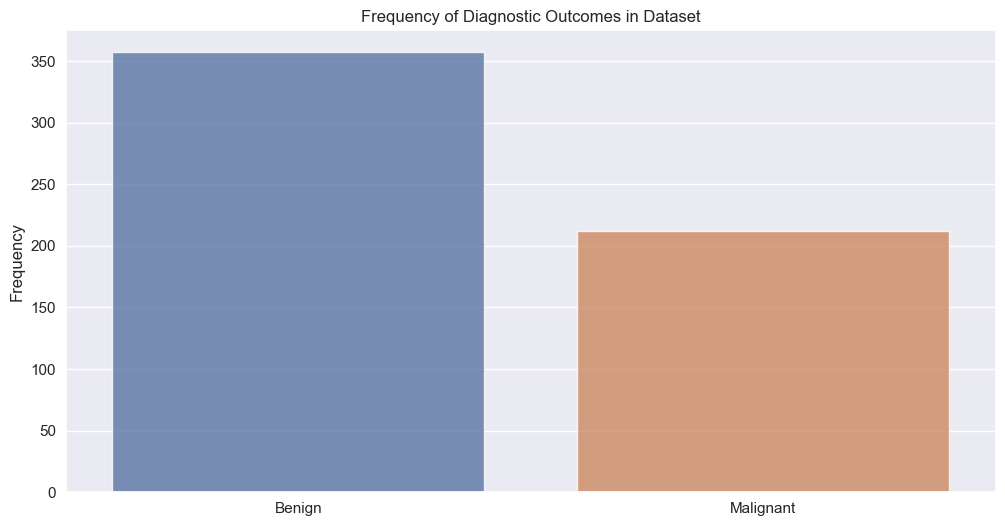

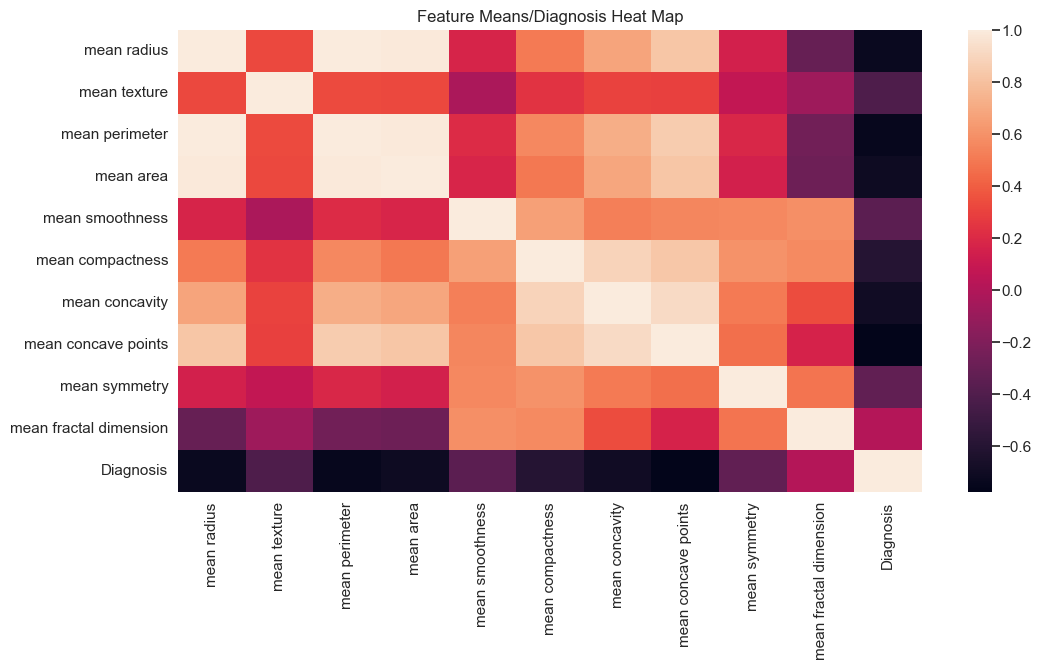

Optimized number of estimators: {'n_estimators': 50}
Model accuracy on test data: 0.9298245614035088
Random Forest Model Confusion Matrix

                  Predicted Malignant  Predicted Benign
Actual Malignant                   34                 8
Actual Benign                       0                72
Random Forest Model Classification Report

              precision    recall  f1-score   support

           0       1.00      0.81      0.89        42
           1       0.90      1.00      0.95        72

    accuracy                           0.93       114
   macro avg       0.95      0.90      0.92       114
weighted avg       0.94      0.93      0.93       114



In [2]:
# Import the applicable libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn import datasets

# Set plot parameters
rcParams['xtick.major.pad'] = 1
rcParams['ytick.major.pad'] = 1

# Load dataset from sklearn
bcDataset = datasets.load_breast_cancer()
bcDataframe = pd.DataFrame(bcDataset.data, columns=bcDataset.feature_names)
bcDataframe['Diagnosis'] = bcDataset.target

# Perform exploratory data analysis
print("DATA SNIPPET\n")
print(bcDataframe.head())
print("MEAN VALUES BY DIAGNOSIS\n")
print(bcDataframe.groupby('Diagnosis').mean())

# Create dataframe for presenting diagnosis counts and percentages
outcome_count = bcDataframe['Diagnosis'].value_counts()
outcome_count = pd.DataFrame(outcome_count)
outcome_count.columns = ['Count']
outcome_count['Percent'] = 100 * outcome_count['Count'] / sum(outcome_count['Count'])
outcome_count.index = ['Benign', 'Malignant']

# Now visualize frequency of diagnoses in the dataset
sns.set(rc={"figure.figsize":(12, 6)}) 
sns.barplot(x = outcome_count.index, y = 'Count', data = outcome_count, alpha = .8)
plt.title('Frequency of Diagnostic Outcomes in Dataset')
plt.ylabel('Frequency')
plt.show()


# Visualize relationships between features and diagnoses
features_means = list(bcDataframe.columns[0:10])
heatMapParamList = features_means + list(bcDataframe.columns[-1:])
sns.heatmap(bcDataframe[heatMapParamList].corr())
sns.set_style("whitegrid")
plt.title('Feature Means/Diagnosis Heat Map')
plt.show()

# Data normalization and splitting
X_train, X_test, y_train, y_test = train_test_split(bcDataframe.iloc[:,:-1], bcDataframe['Diagnosis'], train_size=.8)
norm = Normalizer()
norm.fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

# Model training and evaluation
RF_params = {'n_estimators':[10,50,100, 200]}
RFC = RandomForestClassifier(random_state=42)
model_grid = GridSearchCV(RFC, RF_params)
model_grid.fit(X_train_norm, y_train)
print('Optimized number of estimators:', model_grid.best_params_)
RFC = RandomForestClassifier(n_estimators=50, random_state=42)
RFC.fit(X_train_norm, y_train)
RFC_predicted = RFC.predict(X_test_norm)
print('Model accuracy on test data:', accuracy_score(y_test, RFC_predicted))
confusion_matrix_RF = pd.DataFrame(confusion_matrix(y_test, RFC_predicted), 
                                   index=['Actual Malignant','Actual Benign'],
                                   columns=['Predicted Malignant','Predicted Benign'])
print('Random Forest Model Confusion Matrix\n')
print(confusion_matrix_RF)
print('Random Forest Model Classification Report\n')
print(classification_report(y_test, RFC_predicted))
